In [13]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


## House price prediction using linear regression (multiple features)

Load the house price dataset and also create a copy

In [2]:
dataset = pd.read_csv("./datasets/Housing.csv")
print(dataset.shape)
dset_copy = dataset.copy()
print(tabulate(dataset, headers = 'keys', tablefmt="rounded_grid"))

(545, 13)
╭─────┬──────────┬────────┬────────────┬─────────────┬───────────┬────────────┬─────────────┬────────────┬───────────────────┬───────────────────┬───────────┬────────────┬────────────────────╮
│     │    price │   area │   bedrooms │   bathrooms │   stories │ mainroad   │ guestroom   │ basement   │ hotwaterheating   │ airconditioning   │   parking │ prefarea   │ furnishingstatus   │
├─────┼──────────┼────────┼────────────┼─────────────┼───────────┼────────────┼─────────────┼────────────┼───────────────────┼───────────────────┼───────────┼────────────┼────────────────────┤
│   0 │ 13300000 │   7420 │          4 │           2 │         3 │ yes        │ no          │ no         │ no                │ yes               │         2 │ yes        │ furnished          │
├─────┼──────────┼────────┼────────────┼─────────────┼───────────┼────────────┼─────────────┼────────────┼───────────────────┼───────────────────┼───────────┼────────────┼────────────────────┤
│   1 │ 12250000 │   8960

Checking if the dataset has any null values

In [3]:
null_mask = dataset.isnull().any(axis=1)
dset_copy[null_mask]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


The dataset does not have any empty or NaN values

We need to convert all cells that have text into integer values

In [4]:
dset_copy["mainroad"] = dset_copy["mainroad"].apply(lambda x: 1 if x == "yes" else 0)
dset_copy["guestroom"] = dset_copy["guestroom"].apply(lambda x: 1 if x == "yes" else 0)
dset_copy["basement"] = dset_copy["basement"].apply(lambda x: 1 if x == "yes" else 0)
dset_copy["hotwaterheating"] = dset_copy["hotwaterheating"].apply(lambda x: 1 if x == "yes" else 0)
dset_copy["airconditioning"] = dset_copy["airconditioning"].apply(lambda x: 1 if x == "yes" else 0)
dset_copy["prefarea"] = dset_copy["prefarea"].apply(lambda x: 1 if x == "yes" else 0)
dset_copy["furnishingstatus"] = dset_copy["furnishingstatus"].apply(lambda x: 1 if x == "unfurnished" else (2 if x == "semi-furnished" else 3))
print(tabulate(dset_copy, headers = 'keys', tablefmt="rounded_grid"))

╭─────┬─────────────┬────────┬────────────┬─────────────┬───────────┬────────────┬─────────────┬────────────┬───────────────────┬───────────────────┬───────────┬────────────┬────────────────────╮
│     │       price │   area │   bedrooms │   bathrooms │   stories │   mainroad │   guestroom │   basement │   hotwaterheating │   airconditioning │   parking │   prefarea │   furnishingstatus │
├─────┼─────────────┼────────┼────────────┼─────────────┼───────────┼────────────┼─────────────┼────────────┼───────────────────┼───────────────────┼───────────┼────────────┼────────────────────┤
│   0 │ 1.33e+07    │   7420 │          4 │           2 │         3 │          1 │           0 │          0 │                 0 │                 1 │         2 │          1 │                  3 │
├─────┼─────────────┼────────┼────────────┼─────────────┼───────────┼────────────┼─────────────┼────────────┼───────────────────┼───────────────────┼───────────┼────────────┼────────────────────┤
│   1 │ 1.225e+07   

In [10]:
dset_copy["log_prices"] = np.log(dset_copy["price"])

Plotting a histogram

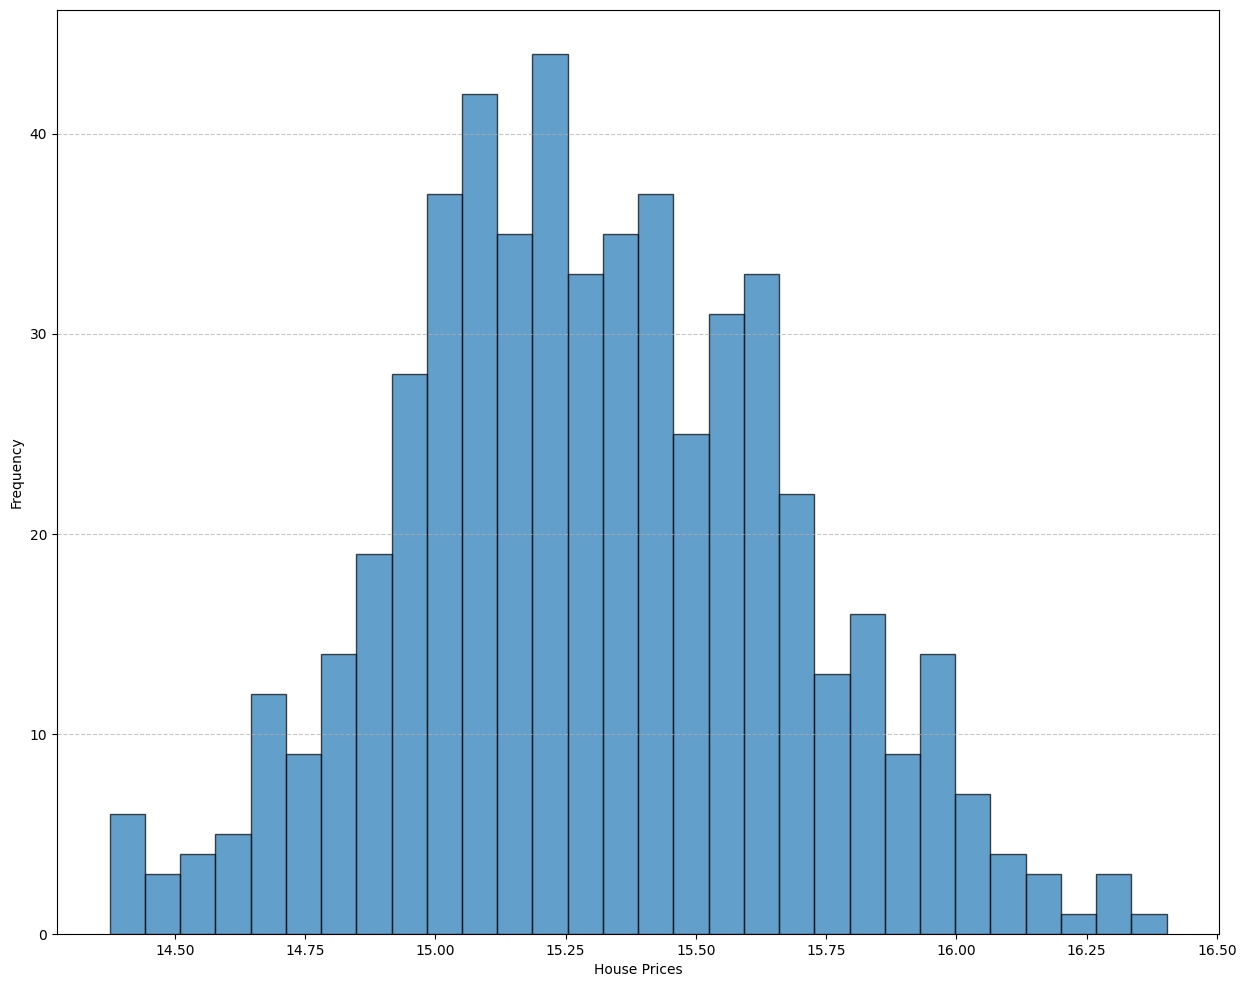

In [12]:
plt.figure(figsize=(15,12))
plt.hist(dset_copy["log_prices"], bins = 30, edgecolor = "black", alpha = 0.7)
plt.xlabel("House Prices")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Creating a correlation matrix

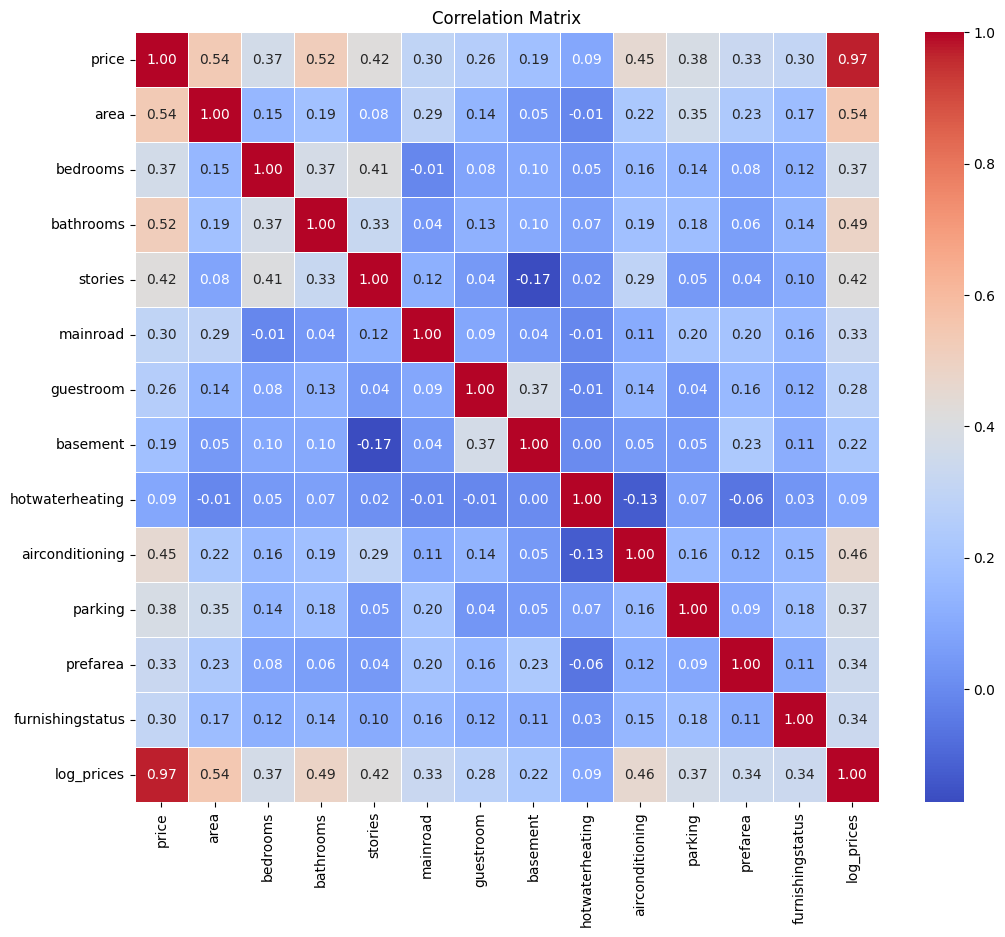

In [18]:
corr_matrix = dset_copy.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Dividing the dataset into X and Y where Y -> Price of the house

In [31]:
X = dset_copy.iloc[:, :-1]
Y = dset_copy.iloc[:, -1:]

In [29]:
X

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,3


In [32]:
Y

,log_prices
0,16.403275
1,16.321036
2,16.321036
3,16.318175
4,16.250001
...,...
540,14.414347
541,14.384879
542,14.375126
543,14.375126


Splitting the dataset into training and test set

In [33]:
X_train, X_Test, Y_Train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2,random_state=42)

In [35]:
X_Test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,4060000,5900,4,2,2,0,0,1,0,0,1,0,1
77,6650000,6500,3,2,3,1,0,0,0,1,0,1,3
360,3710000,4040,2,1,1,1,0,0,0,0,0,0,2
90,6440000,5000,3,1,2,1,0,0,0,1,0,0,2
493,2800000,3960,3,1,1,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,2
357,3773000,6930,4,1,2,0,0,0,0,0,1,0,3
39,7910000,6000,4,2,4,1,0,0,0,1,1,0,2
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,2


Fitting a linear regression model using the training dataset

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_Train)

LinearRegression()

Using the test set to predict the house prices and then calculate mean absolute error and mean squared error

In [63]:
Y_pred = lr_model.predict(X_Test)

In [64]:
Y_test_actual = np.exp(Y_test)
Y_test_actual

,log_prices
316,4060000.0
77,6650000.0
360,3710000.0
90,6440000.0
493,2800000.0
...,...
15,9100000.0
357,3773000.0
39,7910000.0
54,7350000.0


In [65]:
Y_pred_actual = np.exp(Y_pred)
Y_pred_actual

array([[ 3773248.5542267 ],
       [ 6555578.77896229],
       [ 3590603.88137767],
       [ 6074972.59886088],
       [ 3126908.82465668],
       [ 4462971.49199708],
       [ 5015420.6461624 ],
       [ 4579758.49853294],
       [ 2696770.79789733],
       [ 3281334.52080367],
       [12235732.10101381],
       [ 2912274.0191936 ],
       [ 3193901.32906807],
       [ 3356378.74446563],
       [ 2844262.41023263],
       [ 2807598.252242  ],
       [ 2962598.91570077],
       [ 7039276.28222467],
       [ 3229347.5028265 ],
       [ 3117814.85174365],
       [ 6451732.16010934],
       [ 5350617.58823258],
       [ 2530281.69383079],
       [ 4969741.60137167],
       [ 4119962.41369176],
       [18073499.71828837],
       [ 3264790.92448444],
       [ 4923688.69582514],
       [12302310.06833209],
       [ 2960399.90798858],
       [ 6650396.71967758],
       [ 3416911.85045253],
       [ 6544191.81900137],
       [ 3218026.07537058],
       [ 3375657.23527637],
       [ 3994383.345

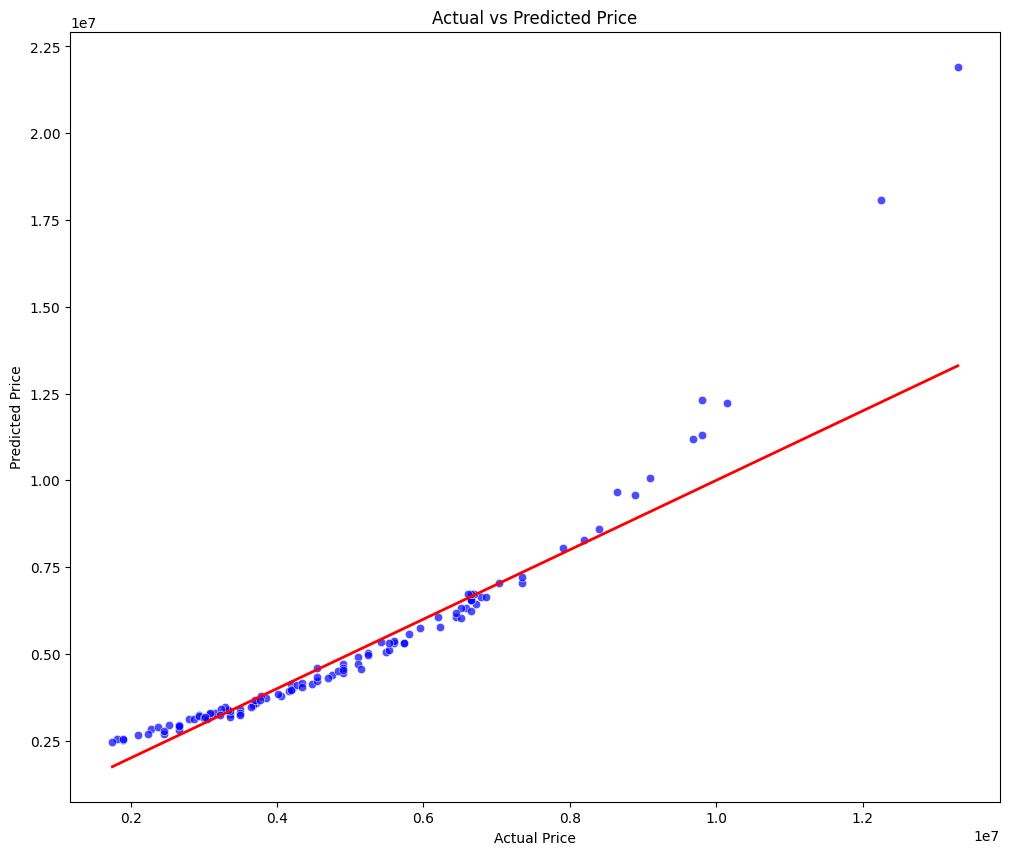

In [76]:
plt.figure(figsize=(12,10))
sns.scatterplot(x = Y_test_actual.values.ravel(), y = Y_pred_actual.ravel(), alpha=0.7, color="blue")
plt.plot([Y_test_actual.min(), Y_test_actual.max()], [Y_test_actual.min(), Y_test_actual.max()], color="red", linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_test_actual, Y_pred_actual)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(Y_test_actual, Y_pred_actual)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(Y_test_actual, Y_pred_actual)
print(f"R2 Score: {r2}")


Mean Absolute Error: 457659.2768072032
Mean Squared Error: 1235559193096.1912
R2 Score: 0.7555560348605239


## Linear Regression using single feature

In [ ]:
prices = dset_copy.iloc[:, :1]
area = dset_copy.iloc[:, 1:2]

,area
0,7420
1,8960
2,9960
3,7500
4,7420
...,...
540,3000
541,2400
542,3620
543,2910
